# Implementation and optimization of the mean-timer technique in drift tube detectors

### Students: Barone Francesco Pio, Nagaro Gianmarco, Ninni Daniele, Valentini Lorenzo

## MEAN-TIMER TECHNIQUE

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotters import plot_event
from plotters import plot_event_from_dataframe

In [2]:
# load the dataset containing the events
source_file = '/home/lab/dat/262_000_definitive.txt'
events = pd.read_csv(source_file, sep=",")
events['LAYERS'] = events['LAYERS'].astype(str)
events

,L1_HIT,L1_TIME,L1_CELL,L2_HIT,L2_TIME,L2_CELL,L3_HIT,L3_TIME,L3_CELL,L4_HIT,L4_TIME,L4_CELL,LAYERS
0,47.0,1.915090e+07,0.0,49.0,1.915103e+07,0.0,45.0,1.915083e+07,0.0,48.0,1.915104e+07,0.0,1234
1,5076.0,2.207774e+09,0.0,5074.0,2.207774e+09,0.0,5075.0,2.207774e+09,0.0,5072.0,2.207774e+09,0.0,1234
2,5977.0,2.616131e+09,0.0,5975.0,2.616131e+09,0.0,NaN,NaN,NaN,5976.0,2.616131e+09,0.0,124
3,NaN,NaN,NaN,8354.0,3.655548e+09,0.0,8356.0,3.655548e+09,0.0,8355.0,3.655548e+09,0.0,234
4,8595.0,3.765115e+09,0.0,8596.0,3.765115e+09,0.0,NaN,NaN,NaN,8597.0,3.765116e+09,0.0,124
5,NaN,NaN,NaN,9788.0,4.305668e+09,0.0,9790.0,4.305668e+09,0.0,9789.0,4.305668e+09,0.0,234
6,NaN,NaN,NaN,12493.0,5.527147e+09,0.0,12495.0,5.527148e+09,0.0,12494.0,5.527147e+09,0.0,234
7,13350.0,5.950649e+09,0.0,13349.0,5.950649e+09,0.0,NaN,NaN,NaN,13351.0,5.950649e+09,0.0,124
8,15271.0,6.832256e+09,0.0,15270.0,6.832255e+09,0.0,NaN,NaN,NaN,15272.0,6.832256e+09,0.0,124
9,18868.0,8.472991e+09,0.0,18867.0,8.472991e+09,0.0,NaN,NaN,NaN,18866.0,8.472991e+09,0.0,124


In [3]:
# define the function that computes the crossing angle
#         ti : time recorded by the i-th layer's cell
#         tj : time recorded by the (i+2)-th layer's cell
#    v_drift : drift velocity
#          h : height of each cell
# angle_sign : sign of the crossing angle (deduced by applying the mean-timer technique)
def crossing_angle(ti, tj, v_drift, h, angle_sign):
    dx = np.abs(v_drift * (ti-tj))   # projection of the distance between the two hits along the direction of the layers
    angle_tan = dx / (2*h)   # tangent of the crossing angle
    angle = angle_sign * np.rad2deg(np.arctan(angle_tan))
    return angle

# define the functions that apply the mean-timer technique to the single event
#       t : list of times recorded by the cells hit by the particle
#       c : list of indices of the cells hit by the particle
#    tmax : maximum drift time
# v_drift : drift velocity
#       h : height of each cell
def meantimer_123(t, c, tmax, v_drift, h):   # case layers 1-2-3
    t1, t2, t3, t4 = t
    c1, c2, c3, c4 = c
    t0 = (t1 + 2*t2 + t3 - 2*tmax) / 4   # time pedestal
    if c2 == c1:
        pattern = 'LRL_'
        angle_sign = np.sign(t1-t3)   
    else:
        pattern = 'RLR_'
        angle_sign = np.sign(t3-t1)
    angle = crossing_angle(t1, t3, v_drift, h, angle_sign)
    return t0, pattern, angle

def meantimer_124(t, c, tmax, v_drift, h):   # case layers 1-2-4
    t1, t2, t3, t4 = t
    c1, c2, c3, c4 = c
    t0 = (2*t1 + 3*t2 - t4 -2*tmax) / 4   # time pedestal
    if c2 == c1:
        pattern = 'LR_R'
        angle_sign = np.sign(t4-t2)   
    else:
        pattern = 'RL_L'
        angle_sign = np.sign(t2-t4)  
    angle = crossing_angle(t2, t4, v_drift, h, angle_sign)
    return t0, pattern, angle

def meantimer_134(t, c, tmax, v_drift, h):   # case layers 1-3-4
    t1, t2, t3, t4 = t
    c1, c2, c3, c4 = c
    t0 = (-t1 + 3*t3 + 2*t4 -2*tmax) / 4   # time pedestal
    if c4 == c1:
        pattern = 'L_LR'
        angle_sign = np.sign(t1-t3)
    else:
        pattern = 'R_RL'
        angle_sign = np.sign(t3-t1)
    angle = crossing_angle(t1, t3, v_drift, h, angle_sign)
    return t0, pattern, angle

def meantimer_234(t, c, tmax, v_drift, h):   # case layers 2-3-4
    t1, t2, t3, t4 = t
    c1, c2, c3, c4 = c
    t0 = (t2 + 2*t3 + t4 -2*tmax) / 4   # time pedestal
    if c3 == c2:
        pattern = '_RLR'
        angle_sign = np.sign(t4-t2)
    else:
        pattern = '_LRL'
        angle_sign = np.sign(t2-t4)
    angle = crossing_angle(t2, t4, v_drift, h, angle_sign)
    return t0, pattern, angle
    
def meantimer_1234(t, c, tmax, v_drift, h):   # case layers 1-2-3-4
    t0_123, pattern_123, angle_123 = meantimer_123(t, c, tmax, v_drift, h)
    t0_124, pattern_124, angle_124 = meantimer_124(t, c, tmax, v_drift, h)
    t0_134, pattern_134, angle_134 = meantimer_134(t, c, tmax, v_drift, h)
    t0_234, pattern_234, angle_234 = meantimer_234(t, c, tmax, v_drift, h)
    
    pedestals, angles = [], []   # lists of plausible time pedestals and crossing angles
    pattern = ''
    sampling = 25   # sampling period of the acquisition system (ns)
    
    # case layers 1-2-3 + layers 1-2-4
    if np.abs(t0_123 - t0_124) < sampling:
        pedestals += [t0_123, t0_124]
        angles += [angle_123, angle_124]
        if pattern == '':
            pattern = pattern_123[:-1] + pattern_124[-1]
    
    # case layers 1-2-3 + layers 1-3-4
    if np.abs(t0_123 - t0_134) < sampling:
        pedestals += [t0_123, t0_134]
        angles += [angle_123, angle_134]
        if pattern == '':
            pattern = pattern_123[:2] + pattern_134[2:]
    
    # case layers 1-2-3 + layers 2-3-4
    if np.abs(t0_123 - t0_234) < sampling:
        pedestals += [t0_123, t0_234]
        angles += [angle_123, angle_234]
        if pattern == '':
            pattern = pattern_123[:2] + pattern_234[2:]
    
    # case layers 1-2-4 + layers 1-3-4
    if np.abs(t0_124 - t0_134) < sampling:
        pedestals += [t0_124, t0_134]
        angles += [angle_124, angle_134]
        if pattern == '':
            pattern = pattern_124[:2] + pattern_134[2:]
    
    # case layers 1-2-4 + layers 2-3-4
    if np.abs(t0_124 - t0_234) < sampling:
        pedestals += [t0_124, t0_234]
        angles += [angle_124, angle_234]
        if pattern == '':
            pattern = pattern_124[:2] + pattern_234[2:]
    
    # case layers 1-3-4 + layers 2-3-4
    if np.abs(t0_134 - t0_234) < sampling:
        pedestals += [t0_134, t0_234]
        angles += [angle_134, angle_234]
        if pattern == '':
            pattern = pattern_134[0] + pattern_234[1:]
    
    if len(pedestals) == 0:
        return 0, 'FAIL', 0
    else:
        t0, angle = np.mean(pedestals), np.mean(angles)
        return t0, pattern, angle

# define the function that applies the mean-timer technique to the dataset containing the events
def meantimer(dataframe):
    df = dataframe.copy()
    
    # dictionary used to select the appropriate function
    meantimers = {'123'  : meantimer_123,
                  '124'  : meantimer_124,
                  '134'  : meantimer_134,
                  '234'  : meantimer_234,
                  '1234' : meantimer_1234}

    # dictionary used to convert the pattern of the trajectory into signs of the positions in the cells
    LR_to_sign = {'L' : -1,
                  'R' : +1,
                  '_' : 0}
    
    # detector parameters
    tmax = 390   # maximum drift time (ns)
    L = 42   # length of each cell (mm)
    h = 13   # height of each cell (mm)
    v_drift = L / (2*tmax)   # drift velocity (mm/ns)
    
    # apply the mean-timer functions to the dataset
    df[['PEDESTAL', 'PATTERN', 'ANGLE']] = df.apply(lambda row: meantimers[row['LAYERS']](row[['L1_TIME', 'L2_TIME', 'L3_TIME', 'L4_TIME']],
                                                                                          row[['L1_CELL', 'L2_CELL', 'L3_CELL', 'L4_CELL']],
                                                                                          tmax, v_drift, h), axis=1, result_type="expand")
    df = df[df['PATTERN'] != 'FAIL']   # reject 4-hits events for which it is not possible to compute the time pedestal properly
    for i in range(1, 5):
        df['L'+str(i)+'_DRIFT'] = np.abs(df['L'+str(i)+'_TIME'] - df['PEDESTAL'])
        df = df[(df['L'+str(i)+'_DRIFT'] < tmax) | (np.isnan(df['L'+str(i)+'_DRIFT']))]   # reject events with drift times >= 'tmax'
        df['L'+str(i)+'_X'] = v_drift * df['L'+str(i)+'_DRIFT'] * (df['PATTERN'].str[i-1]).replace(LR_to_sign)
    
    df = df.reset_index(drop=True)
    return df

events = meantimer(events)   # takes about 80 seconds
events

,L1_HIT,L1_TIME,L1_CELL,L2_HIT,L2_TIME,L2_CELL,L3_HIT,L3_TIME,L3_CELL,L4_HIT,...,PATTERN,ANGLE,L1_DRIFT,L1_X,L2_DRIFT,L2_X,L3_DRIFT,L3_X,L4_DRIFT,L4_X
0,47.0,1.915090e+07,0.0,49.0,1.915103e+07,0.0,45.0,1.915083e+07,0.0,48.0,...,LRLR,4.626673,150.625000,-8.110577,282.291667,15.200321,88.125000,-4.745192,298.125000,16.052885
1,5076.0,2.207774e+09,0.0,5074.0,2.207774e+09,0.0,5075.0,2.207774e+09,0.0,5072.0,...,LRLR,-8.973195,166.562500,-8.968750,189.062500,10.180288,239.062500,-12.872596,109.062500,5.872596
2,NaN,NaN,NaN,8354.0,3.655548e+09,0.0,8356.0,3.655548e+09,0.0,8355.0,...,_RLR,20.531272,NaN,NaN,22.708333,1.222756,276.875000,-14.908654,203.541667,10.959936
3,NaN,NaN,NaN,9788.0,4.305668e+09,0.0,9790.0,4.305668e+09,0.0,9789.0,...,_RLR,22.667994,NaN,NaN,22.500000,1.211538,266.666667,-14.358974,224.166667,12.070513
4,NaN,NaN,NaN,12493.0,5.527147e+09,0.0,12495.0,5.527148e+09,0.0,12494.0,...,_RLR,12.456994,NaN,NaN,55.416666,2.983974,281.250000,-15.144231,162.083333,8.727564
5,18868.0,8.472991e+09,0.0,18867.0,8.472991e+09,0.0,NaN,NaN,NaN,18866.0,...,LR_R,10.366989,275.833333,-14.852564,158.333333,8.525641,NaN,NaN,246.666666,13.282051
6,NaN,NaN,NaN,19801.0,8.877789e+09,0.0,19803.0,8.877789e+09,0.0,19802.0,...,_RLR,12.173840,NaN,NaN,31.041666,1.671474,306.875000,-16.524038,135.208334,7.280449
7,NaN,NaN,NaN,21872.0,9.844959e+09,0.0,21874.0,9.844959e+09,0.0,21873.0,...,_RLR,21.049816,NaN,NaN,39.375000,2.120192,257.708334,-13.876603,225.208334,12.126603
8,23854.0,1.064583e+10,0.0,23853.0,1.064583e+10,0.0,NaN,NaN,NaN,23852.0,...,LR_R,0.889878,356.041668,-19.171474,37.708336,2.030449,NaN,NaN,45.208336,2.434295
9,24315.0,1.069973e+10,0.0,24318.0,1.069973e+10,0.0,24314.0,1.069973e+10,0.0,24317.0,...,LRLR,2.214988,129.895832,-6.994391,299.895832,16.148237,80.729166,-4.346955,288.229166,15.520032


In [4]:
# write the DataFrame 'events' to a csv file
output_file = '/home/lab/dat/262_000_full_elab.txt'
#events.to_csv(output_file, index=False)

In [5]:
# load the DataFrame 'events' from file
events = pd.read_csv(output_file, sep=",")

## PLOTTING

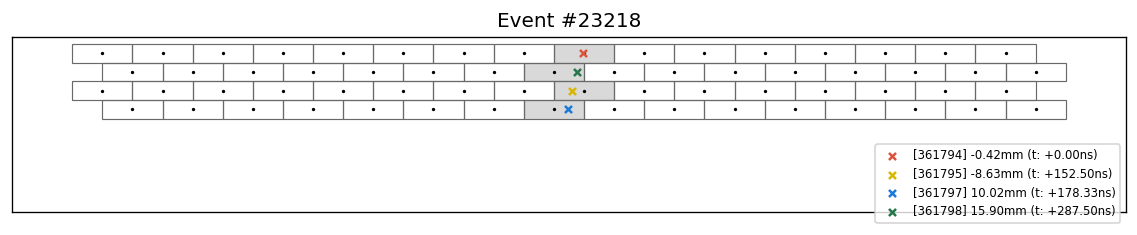

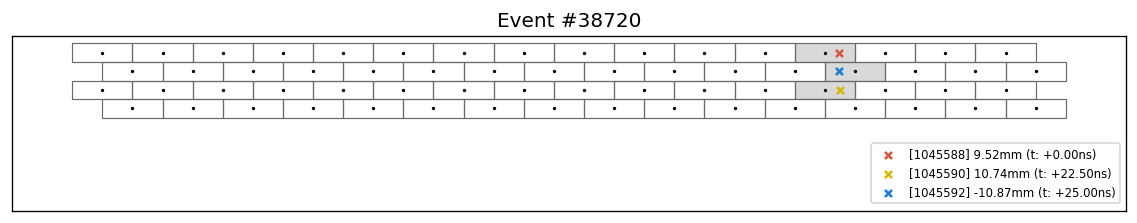

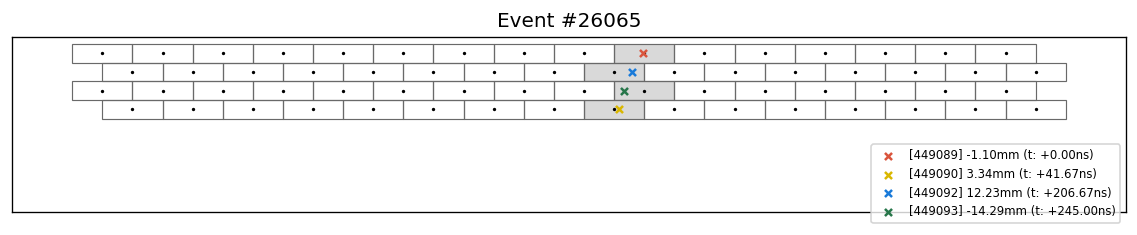

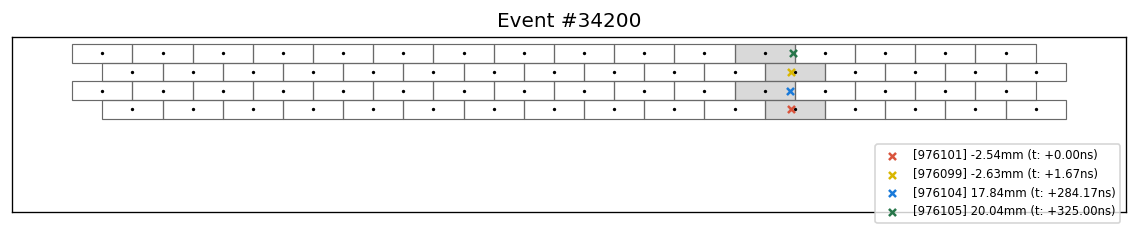

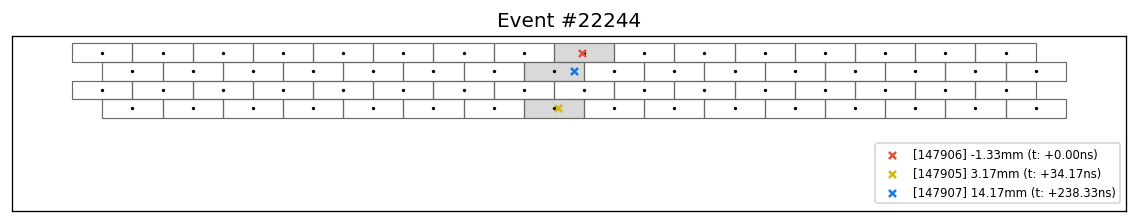

In [6]:
# plot 5 random events
for i in range(5):
    j = npr.randint(0, len(events))
    plot_event_from_dataframe(events, index=j, title = f'Event #{j}', focus_area=False)

## DRIFT TIMES DISTRIBUTION (expected uniform between 0 and tmax)

In [7]:
#for i in range(1, 5):
#    sns.displot(data=events, x='L'+str(i)+'_DRIFT', kind=hist, color='blue', height=10)
    
#sns.pairplot(data=events[['L1_DRIFT', 'L2_DRIFT', 'L3_DRIFT', 'L4_DRIFT']], color='blue', height=10)

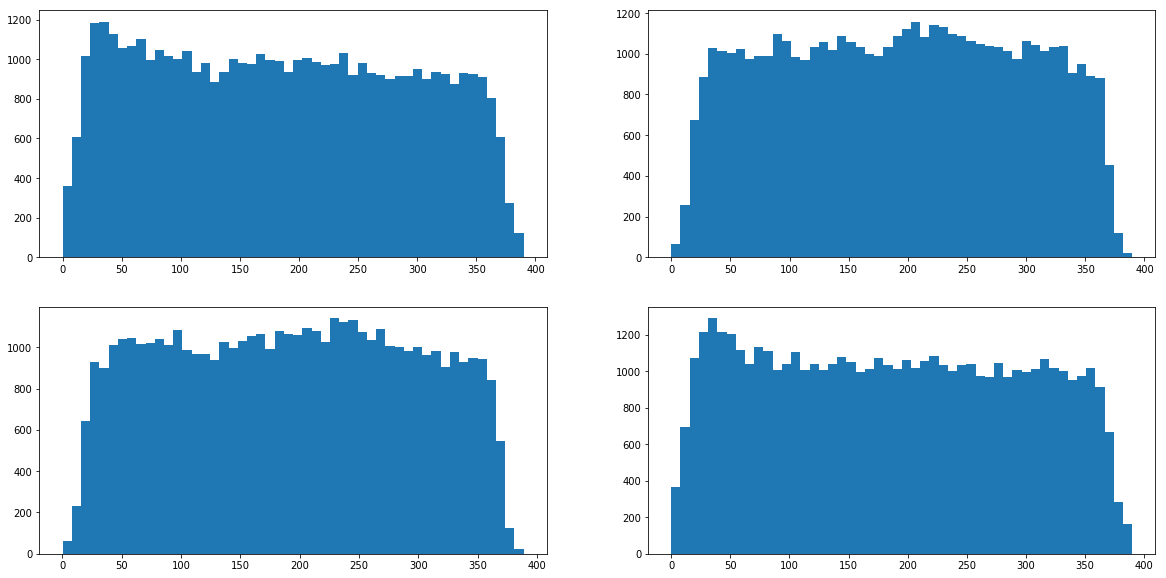

In [11]:
fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2, figsize=(20, 10))
ax1.hist(events['L1_DRIFT'].dropna(), bins=50)
ax2.hist(events['L2_DRIFT'].dropna(), bins=50)
ax3.hist(events['L3_DRIFT'].dropna(), bins=50)
ax4.hist(events['L4_DRIFT'].dropna(), bins=50)
plt.show()

## ANGULAR DISTRIBUTION

In [9]:
#sns.displot(data=events, x='ANGLE', kind=hist, color='blue', height=10)

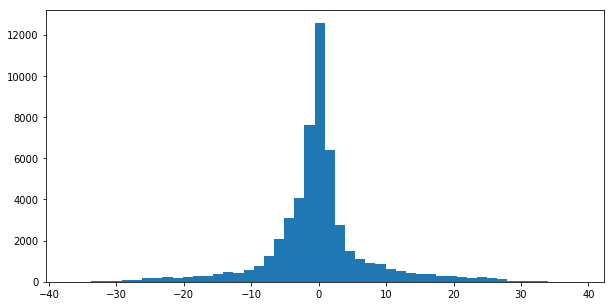

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(events['ANGLE'], bins=50)
plt.show()